In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dt=pd.read_csv('/content/data-set for decision tree.csv')
dt
display(dt.head())

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [3]:
# Handle missing values by replacing '?' with NaN
dt.replace('?', np.nan, inplace=True)

dt.dropna(inplace=True)

In [4]:
label_encoders = {}
for column in dt.columns:
    if dt[column].dtype == 'object':
        le = LabelEncoder()
        dt[column] = le.fit_transform(dt[column])
        label_encoders[column] = le

In [5]:
X = dt.drop(columns=["income"])
y = dt["income"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      4533
           1       0.60      0.54      0.56      1500

    accuracy                           0.79      6033
   macro avg       0.72      0.71      0.72      6033
weighted avg       0.79      0.79      0.79      6033



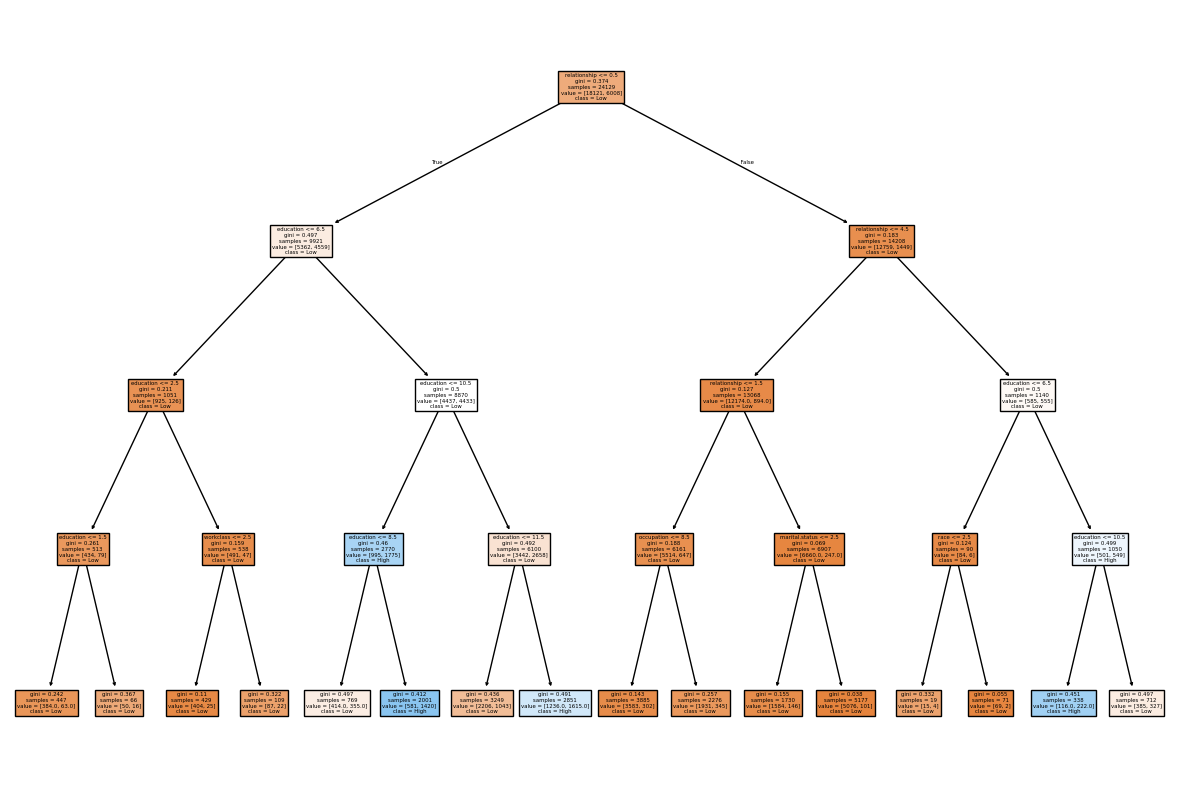

In [10]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=["Low", "High"], filled=True)
plt.show()